(300, 545, 3)
src_h, src_w =  300 545
dst_h, dst_w =  600 1090


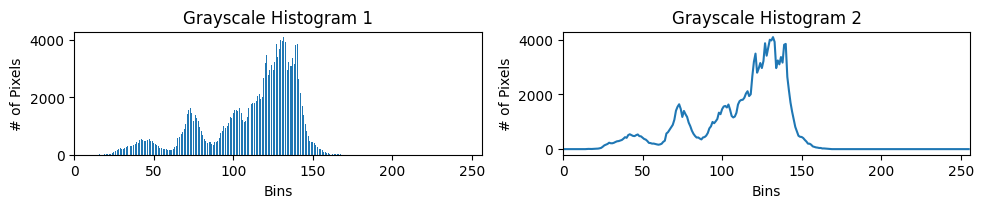

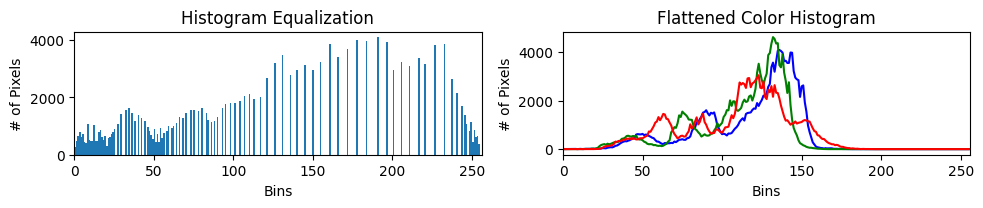

-1

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 最邻近插值
def function(image):
    height,width,channel=image.shape
    zeroimag = np.zeros((600,1090,channel), np.uint8)
    sh=600/height
    sw=1090/width
    for i in range(600):
        for j in range(1090):
            x=int(i/sh ) # 四舍五入
            y=int(j/sw)
            #print(x,y)
            zeroimag[i,j]=image[x,y]
    return zeroimag


# 双线性插值
def bilinear_interpolation(img,out_dim):
    src_h, src_w, channel = img.shape
    dst_h, dst_w = out_dim[1], out_dim[0] # 宽、高
    print ("src_h, src_w = ", src_h, src_w)
    print ("dst_h, dst_w = ", dst_h, dst_w)
    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    dst_img = np.zeros((dst_h,dst_w,3),dtype=np.uint8)
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    for i in range(3):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
 
                # find the origin x and y coordinates of dst image x and y
                # use geometric center symmetry
                # if use direct way, src_x = dst_x * scale_x
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5
 
                # find the coordinates of the points which will be used to compute the interpolation
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1 ,src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)
 
                # calculate the interpolation
                temp0 = (src_x1 - src_x) * img[src_y0,src_x0,i] + (src_x - src_x0) * img[src_y0,src_x1,i]
                temp1 = (src_x1 - src_x) * img[src_y1,src_x0,i] + (src_x - src_x0) * img[src_y1,src_x1,i]
                dst_img[dst_y,dst_x,i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
    return dst_img



image=cv2.imread("1.jpg")

print(image.shape)
out1=function(image) # 最近邻函数
#print(out.shape)
#cv2.imshow("zuijinlin", out)
out2=bilinear_interpolation(image,(1090,600)) # 双线性插值函数
cv2.imshow("zuijinlin", out1)
cv2.imshow("bilinear", out2)
cv2.imshow("src image", image)
cv2.waitKey() 

##################################################################
# 直方图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 灰度图像的直方图，方法一
plt.figure()
plt.subplot(221)
plt.title("Grayscale Histogram 1")
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
#plt.plot(hist)
plt.xlim([0,256])#设置x坐标轴范围
plt.hist(gray.ravel(), 256)
#plt.show()


# 灰度图像的直方图, 方法二
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
#plt.figure()#新建一个图像
plt.subplots_adjust(left=0.1, bottom=None, right=1.5, top=None, wspace=None, hspace=1) # 调整子图间距
plt.subplot(222)
plt.title("Grayscale Histogram 2")
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist)
plt.xlim([0,256])#设置x坐标轴范围
plt.show()

# 灰度图像直方图均衡化
dst = cv2.equalizeHist(gray)
plt.subplots_adjust(left=0.1, bottom=None, right=1.5, top=None, wspace=None, hspace=1) # 调整子图间距
plt.subplot(223)
plt.title("Histogram Equalization")
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.xlim([0,256])#设置x坐标轴范围
plt.hist(dst.ravel(), 256)
cv2.imshow("Histogram Equalization", np.hstack([gray, dst]))
cv2.waitKey()

# 彩色图像直方图
chans = cv2.split(image)
#print(chans)
colors = ("b","g","r")
#plt.figure()
plt.subplot(224)
plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan,color) in zip(chans,colors):
    hist = cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist,color = color)
    plt.xlim([0,256])
plt.show()

# 彩色图像直方图均衡化
(b, g, r) = cv2.split(image)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
result = cv2.merge((bH, gH, rH))
cv2.imshow("dst_rgb", np.hstack([image, result]))
cv2.waitKey(0)